## Importing Libraries

In [111]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('rheumatoid_arthritis_dataset.csv')

## Data Understanding

In [113]:
df.head()

,SEQN,RheumatoidArthritis,BRI,Gender,Age,Race,EducationLevel,MaritalStatus,FamilyIncome,PhysicalActivity,...,ProteinConsumption,CarbohydrateConsumption,FatConsumption,CaffeineConsumption,FiberConsumption,PSU,STRATA,BRI_Grp,BRI_Trend,Weight
0,62161,0,2.815371,Male,22,Non-Hispanic White,High school graduate,Living Alone,"(1.3,3.5]",Other,...,104.68,359.59,123.81,0,18.6,1,91,"[1.049, 3.666]",0,22313.349230
1,62169,0,2.017701,Male,21,Other,High school graduate,Living Alone,PIR <= 1.3,Other,...,77.46,297.51,34.61,40,4.3,1,92,"[1.049, 3.666]",0,3128.647493
2,62172,0,7.888557,Female,43,Non-Hispanic Black,High school graduate,Living Alone,"(1.3,3.5]",Sedentary,...,57.43,192.82,42.02,54,2.8,2,96,"(6.477, 20.970]",3,5861.037901
3,62176,0,3.760754,Female,34,Non-Hispanic White,Above high school,Living With A Partner,PIR > 3.5,Vigorous activity,...,144.81,281.44,112.90,197,41.9,1,99,"(3.666, 4.924]",1,11702.304220
4,62178,1,6.569817,Male,80,Non-Hispanic White,High school graduate,Living Alone,PIR <= 1.3,Other,...,48.71,302.33,79.97,17,14.0,1,95,"(6.477, 20.970]",3,2671.990112


In [114]:
df.shape

(13273, 27)

In [115]:
df.dtypes.value_counts()

object     12
int64       8
float64     7
Name: count, dtype: int64

In [116]:
df.isnull().sum()

SEQN                       0
RheumatoidArthritis        0
BRI                        0
Gender                     0
Age                        0
Race                       0
EducationLevel             0
MaritalStatus              0
FamilyIncome               0
PhysicalActivity           0
SmokingStatus              0
BMI                        0
DrinkingStatus             0
Hypertension               0
Diabetes                   0
Hyperlipidemia             0
CalorieConsumption         0
ProteinConsumption         0
CarbohydrateConsumption    0
FatConsumption             0
CaffeineConsumption        0
FiberConsumption           0
PSU                        0
STRATA                     0
BRI_Grp                    0
BRI_Trend                  0
Weight                     0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13273 entries, 0 to 13272
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     13273 non-null  int64  
 1   RheumatoidArthritis      13273 non-null  int64  
 2   BRI                      13273 non-null  float64
 3   Gender                   13273 non-null  object 
 4   Age                      13273 non-null  int64  
 5   Race                     13273 non-null  object 
 6   EducationLevel           13273 non-null  object 
 7   MaritalStatus            13273 non-null  object 
 8   FamilyIncome             13273 non-null  object 
 9   PhysicalActivity         13273 non-null  object 
 10  SmokingStatus            13273 non-null  object 
 11  BMI                      13273 non-null  float64
 12  DrinkingStatus           13273 non-null  object 
 13  Hypertension             13273 non-null  object 
 14  Diabetes              

In [118]:
df.duplicated().sum()

np.int64(0)

In [119]:
df.drop(columns = ['SEQN', 'PSU', 'STRATA', 'BRI_Grp', 'BRI_Trend', 'Weight', 'BMI'], inplace = True)

In [120]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RheumatoidArthritis,13273.0,0.062533,0.242130,0.000000,0.000000,0.000000,0.000000,1.000000
BRI,13273.0,5.317289,2.328315,1.048869,3.665968,4.924353,6.476923,20.970057
Age,13273.0,45.123032,16.696345,20.000000,31.000000,43.000000,58.000000,80.000000
CalorieConsumption,13273.0,2178.910872,1020.844450,0.000000,1489.000000,2006.000000,2668.000000,13687.000000
ProteinConsumption,13273.0,83.273651,44.208148,0.000000,53.630000,75.330000,103.170000,557.870000
CarbohydrateConsumption,13273.0,256.412823,127.097817,0.000000,169.470000,235.830000,317.330000,1815.020000
FatConsumption,13273.0,84.772704,48.666870,0.000000,51.420000,75.970000,108.000000,553.790000
CaffeineConsumption,13273.0,136.733218,182.296488,0.000000,9.000000,90.000000,194.000000,4320.000000
FiberConsumption,13273.0,17.074934,10.998244,0.000000,9.500000,14.700000,22.000000,136.300000


In [122]:
cols = df.columns
cols

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [123]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    print("----------------------------")
    print(col, " → ", df[col].unique())
    print(df[col].value_counts())
    print()

----------------------------
Gender  →  ['Male' 'Female']
Gender
Male      6847
Female    6426
Name: count, dtype: int64

----------------------------
Race  →  ['Non-Hispanic White' 'Other' 'Non-Hispanic Black' 'Mexican American']
Race
Non-Hispanic White    4778
Other                 3574
Non-Hispanic Black    3117
Mexican American      1804
Name: count, dtype: int64

----------------------------
EducationLevel  →  ['High school graduate' 'Above high school' 'Below high school']
EducationLevel
Above high school       7962
High school graduate    2940
Below high school       2371
Name: count, dtype: int64

----------------------------
MaritalStatus  →  ['Living Alone' 'Living With A Partner']
MaritalStatus
Living With A Partner    7845
Living Alone             5428
Name: count, dtype: int64

----------------------------
FamilyIncome  →  ['(1.3,3.5]' 'PIR <= 1.3' 'PIR > 3.5']
FamilyIncome
(1.3,3.5]     4908
PIR > 3.5     4316
PIR <= 1.3    4049
Name: count, dtype: int64

----------------

In [124]:
df['RheumatoidArthritis'].value_counts()

RheumatoidArthritis
0    12443
1      830
Name: count, dtype: int64

In [125]:
df['RheumatoidArthritis'].value_counts(normalize=True) * 100

RheumatoidArthritis
0    93.746704
1     6.253296
Name: proportion, dtype: float64

In [126]:
df[['BRI','Age','CalorieConsumption']].skew()

BRI                   1.218270
Age                   0.347654
CalorieConsumption    1.622224
dtype: float64

In [127]:
df.isna().sum()

RheumatoidArthritis        0
BRI                        0
Gender                     0
Age                        0
Race                       0
EducationLevel             0
MaritalStatus              0
FamilyIncome               0
PhysicalActivity           0
SmokingStatus              0
DrinkingStatus             0
Hypertension               0
Diabetes                   0
Hyperlipidemia             0
CalorieConsumption         0
ProteinConsumption         0
CarbohydrateConsumption    0
FatConsumption             0
CaffeineConsumption        0
FiberConsumption           0
dtype: int64

# Data Analysis

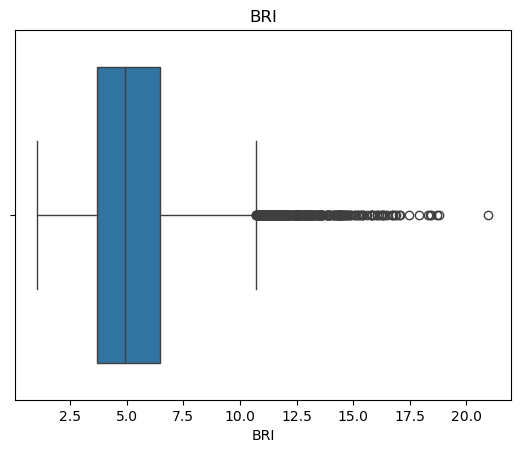

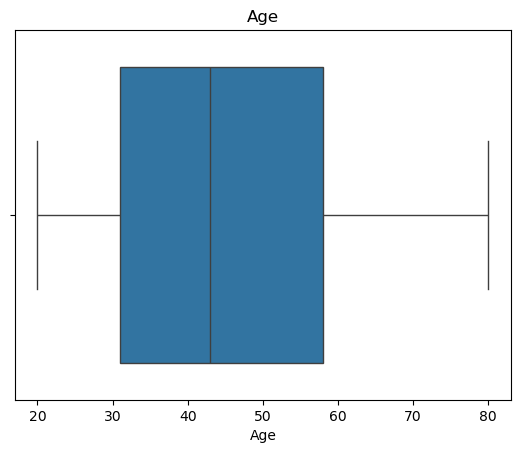

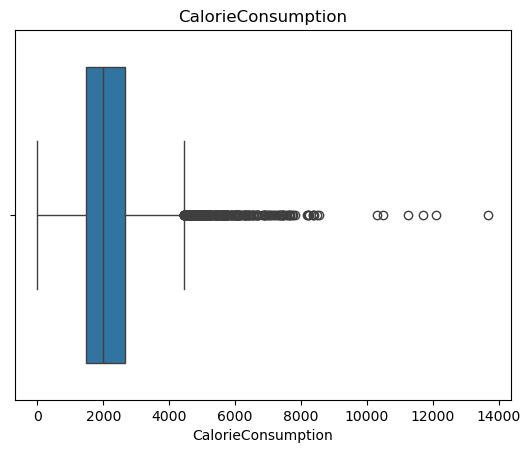

In [128]:
for col in ['BRI','Age','CalorieConsumption']:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

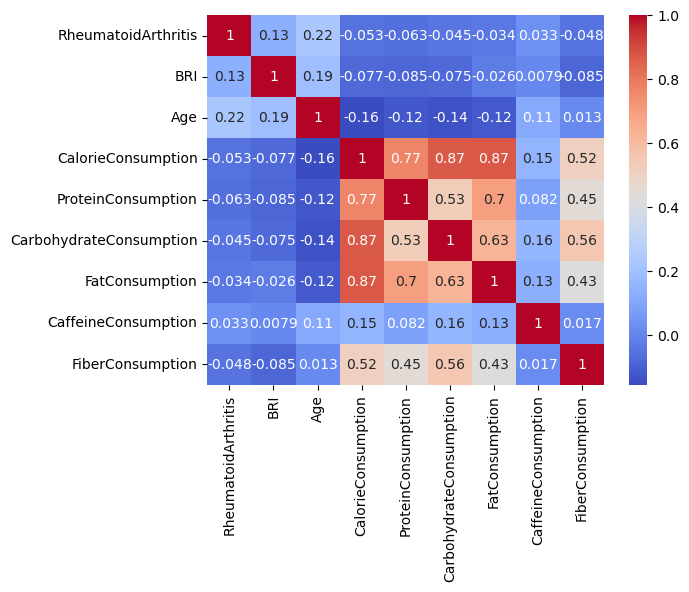

In [129]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [130]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

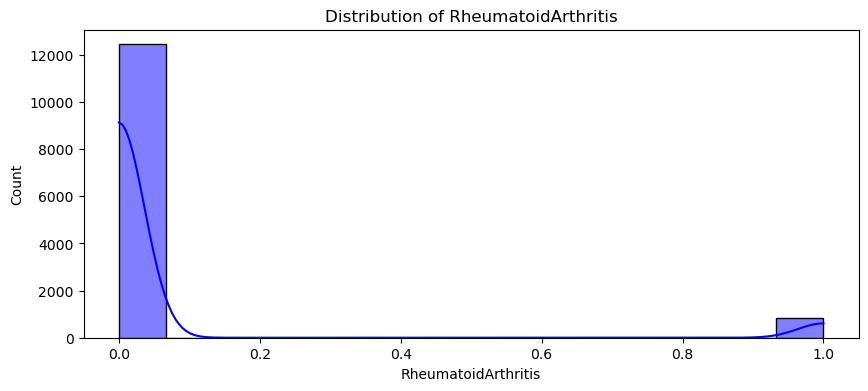

RheumatoidArthritis → Mean: 0.06
, Median: 0.00
, Skew: 3.61
, Kurtosis: 11.06


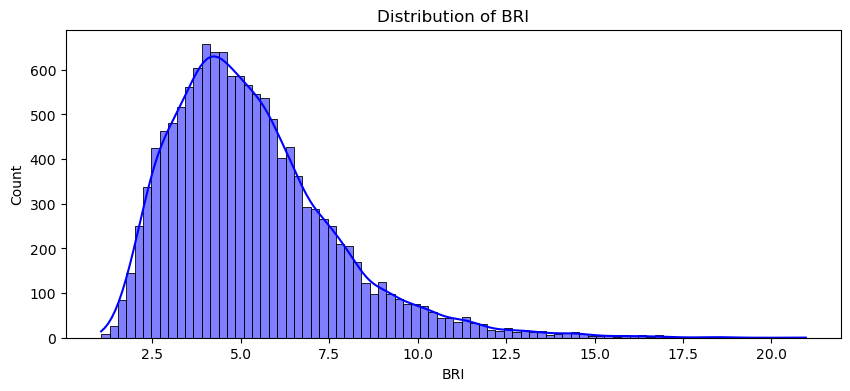

BRI → Mean: 5.32
, Median: 4.92
, Skew: 1.22
, Kurtosis: 2.41


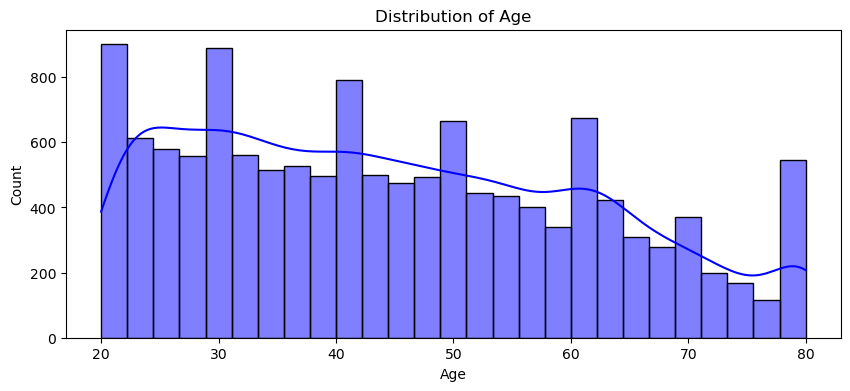

Age → Mean: 45.12
, Median: 43.00
, Skew: 0.35
, Kurtosis: -0.90


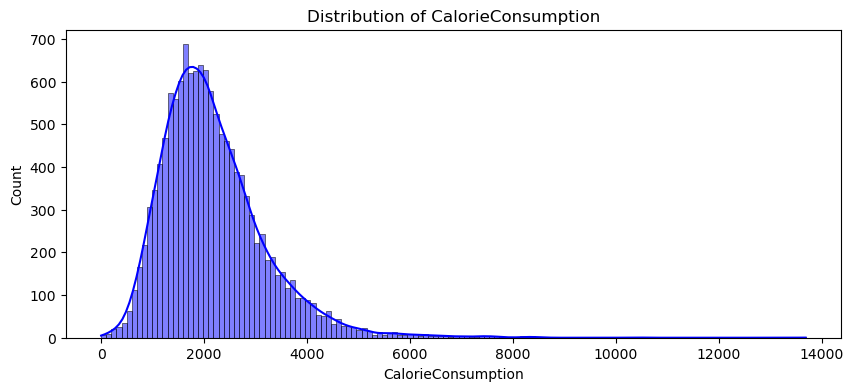

CalorieConsumption → Mean: 2178.91
, Median: 2006.00
, Skew: 1.62
, Kurtosis: 6.56


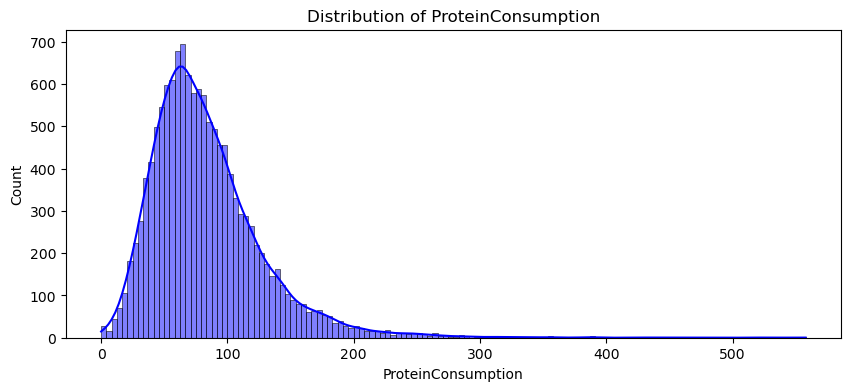

ProteinConsumption → Mean: 83.27
, Median: 75.33
, Skew: 1.79
, Kurtosis: 7.68


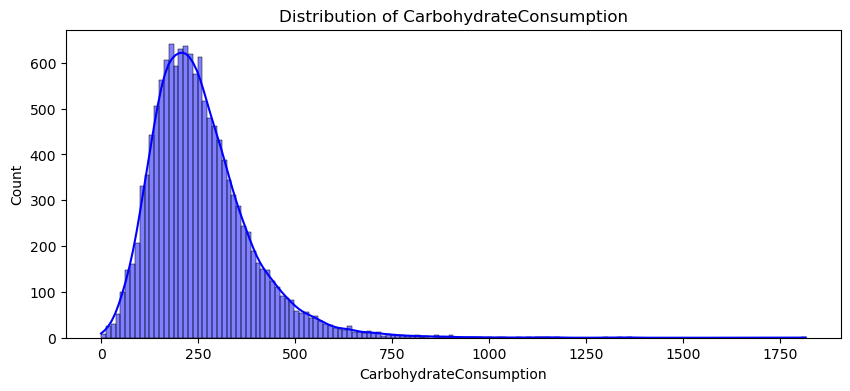

CarbohydrateConsumption → Mean: 256.41
, Median: 235.83
, Skew: 1.58
, Kurtosis: 6.49


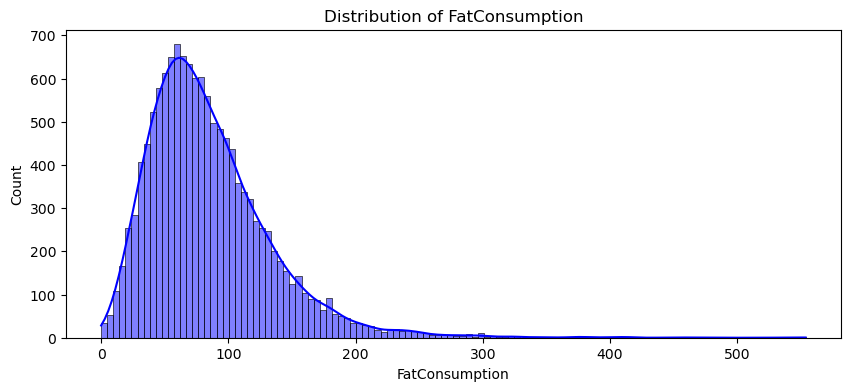

FatConsumption → Mean: 84.77
, Median: 75.97
, Skew: 1.69
, Kurtosis: 6.44


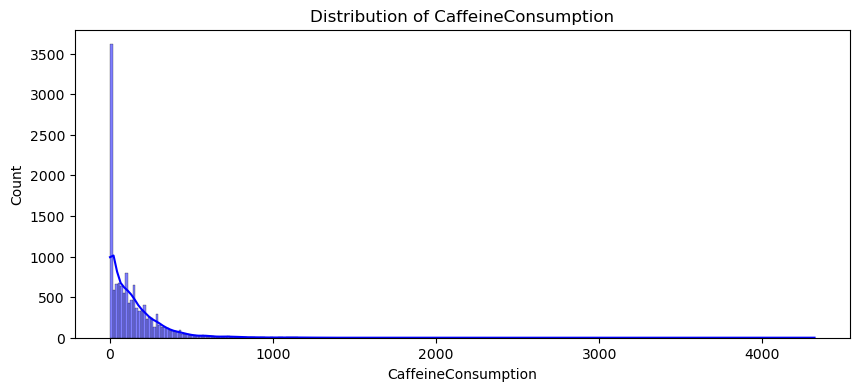

CaffeineConsumption → Mean: 136.73
, Median: 90.00
, Skew: 5.04
, Kurtosis: 63.71


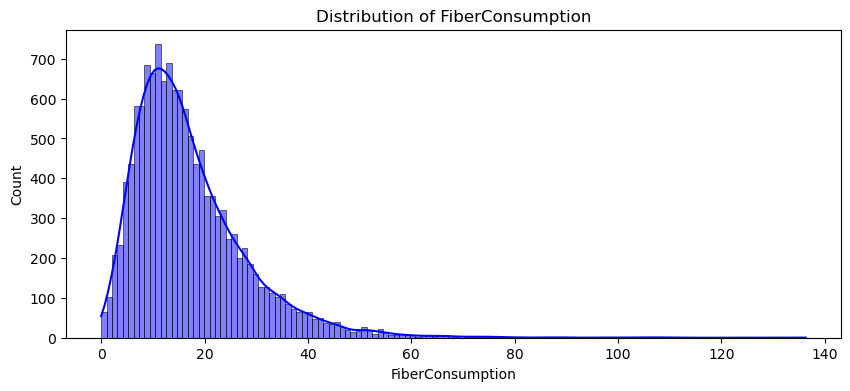

FiberConsumption → Mean: 17.07
, Median: 14.70
, Skew: 1.75
, Kurtosis: 6.14


In [131]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    print(f"{col} → Mean: {mean:.2f}\n, Median: {median:.2f}\n, Skew: {skewness:.2f}\n, Kurtosis: {kurtosis:.2f}")

In [132]:
def outlier_summary(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers

print("\n--> Outlier counts per feature:")
for col in num_cols:
    print(f"{col}: {outlier_summary(df[col])}")


--> Outlier counts per feature:
RheumatoidArthritis: 830
BRI: 404
Age: 0
CalorieConsumption: 387
ProteinConsumption: 472
CarbohydrateConsumption: 406
FatConsumption: 393
CaffeineConsumption: 537
FiberConsumption: 488


In [133]:
df.drop(columns=['CarbohydrateConsumption','FatConsumption','ProteinConsumption','FiberConsumption'],inplace=True)

In [134]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'CaffeineConsumption'],
      dtype='object')

In [135]:
cat_cols = ['Gender','Race','EducationLevel','MaritalStatus','FamilyIncome',
            'PhysicalActivity','SmokingStatus','DrinkingStatus',
            'Hypertension','Diabetes','Hyperlipidemia']

for col in cat_cols:
    print(f"\n--- {col} vs RA ---")
    print(pd.crosstab(df[col], df['RheumatoidArthritis'], normalize='index'))


--- Gender vs RA ---
RheumatoidArthritis         0         1
Gender                                 
Female               0.926082  0.073918
Male                 0.948152  0.051848

--- Race vs RA ---
RheumatoidArthritis         0         1
Race                                   
Mexican American     0.945676  0.054324
Non-Hispanic Black   0.912095  0.087905
Non-Hispanic White   0.937212  0.062788
Other                0.955792  0.044208

--- EducationLevel vs RA ---
RheumatoidArthritis          0         1
EducationLevel                          
Above high school     0.948003  0.051997
Below high school     0.915226  0.084774
High school graduate  0.926871  0.073129

--- MaritalStatus vs RA ---
RheumatoidArthritis           0         1
MaritalStatus                            
Living Alone           0.932203  0.067797
Living With A Partner  0.941109  0.058891

--- FamilyIncome vs RA ---
RheumatoidArthritis         0         1
FamilyIncome                           
(1.3,3.5]         

In [136]:
cat_cols.remove('Race')



===== Gender vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Gender                        
Female               5951  475
Male                 6492  355

Percentage Row-wise:
RheumatoidArthritis          0         1
Gender                                  
Female               92.608154  7.391846
Male                 94.815248  5.184752


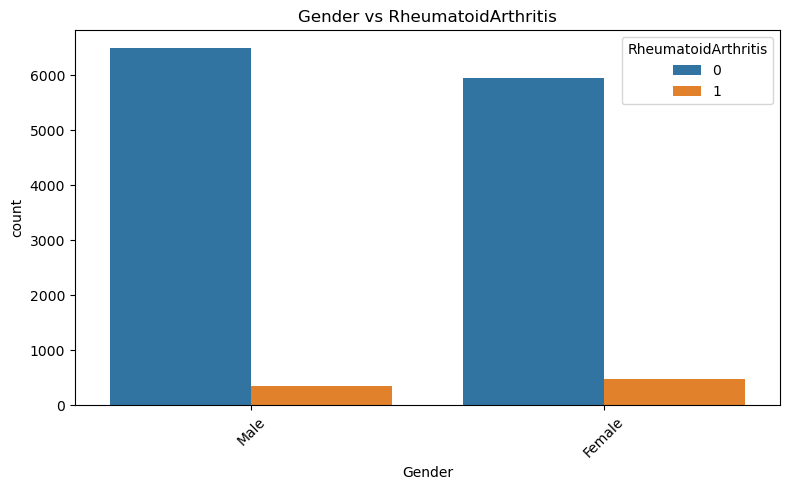



===== EducationLevel vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis      0    1
EducationLevel                 
Above high school     7548  414
Below high school     2170  201
High school graduate  2725  215

Percentage Row-wise:
RheumatoidArthritis           0         1
EducationLevel                           
Above high school     94.800301  5.199699
Below high school     91.522564  8.477436
High school graduate  92.687075  7.312925


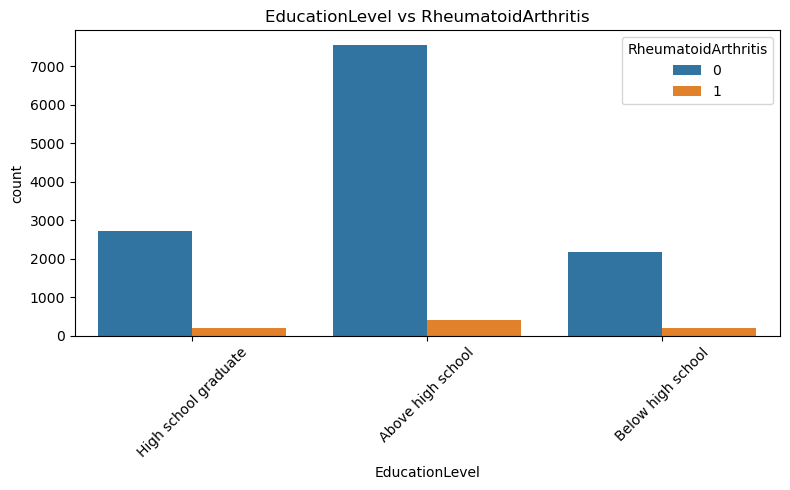



===== MaritalStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis       0    1
MaritalStatus                   
Living Alone           5060  368
Living With A Partner  7383  462

Percentage Row-wise:
RheumatoidArthritis            0         1
MaritalStatus                             
Living Alone           93.220339  6.779661
Living With A Partner  94.110899  5.889101


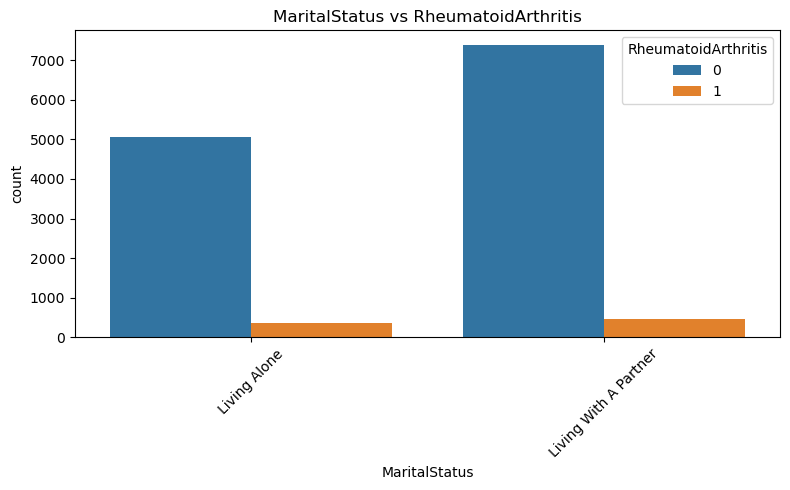



===== FamilyIncome vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
FamilyIncome                  
(1.3,3.5]            4623  285
PIR <= 1.3           3715  334
PIR > 3.5            4105  211

Percentage Row-wise:
RheumatoidArthritis          0         1
FamilyIncome                            
(1.3,3.5]            94.193154  5.806846
PIR <= 1.3           91.751050  8.248950
PIR > 3.5            95.111214  4.888786


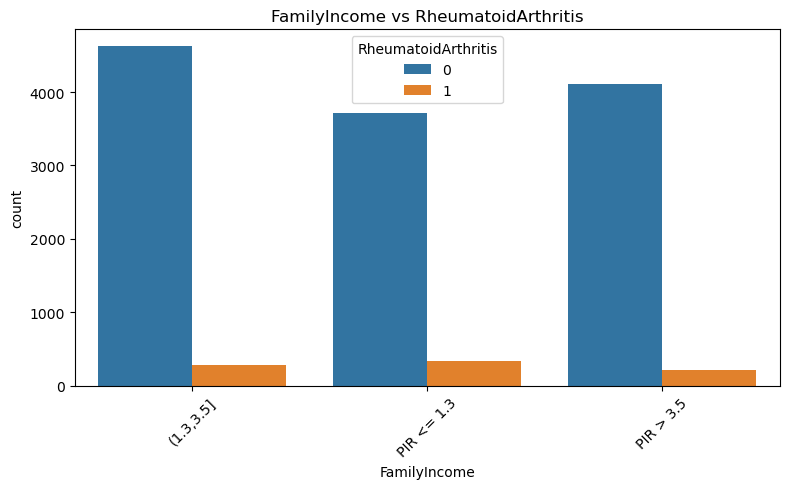



===== PhysicalActivity vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
PhysicalActivity              
Moderate activity    3156  228
Other                4599  416
Sedentary             998   90
Vigorous activity    3690   96

Percentage Row-wise:
RheumatoidArthritis          0         1
PhysicalActivity                        
Moderate activity    93.262411  6.737589
Other                91.704885  8.295115
Sedentary            91.727941  8.272059
Vigorous activity    97.464342  2.535658


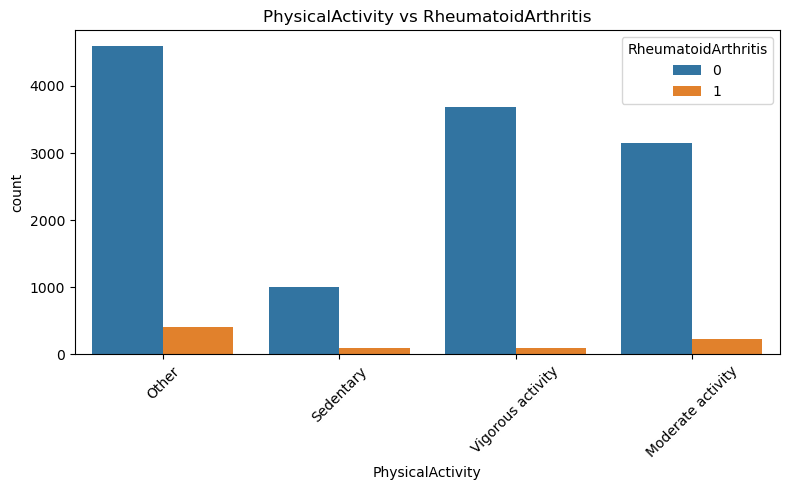



===== SmokingStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
SmokingStatus                 
Current              2379  187
Former               2403  231
Never                7661  412

Percentage Row-wise:
RheumatoidArthritis          0         1
SmokingStatus                           
Current              92.712393  7.287607
Former               91.230068  8.769932
Never                94.896569  5.103431


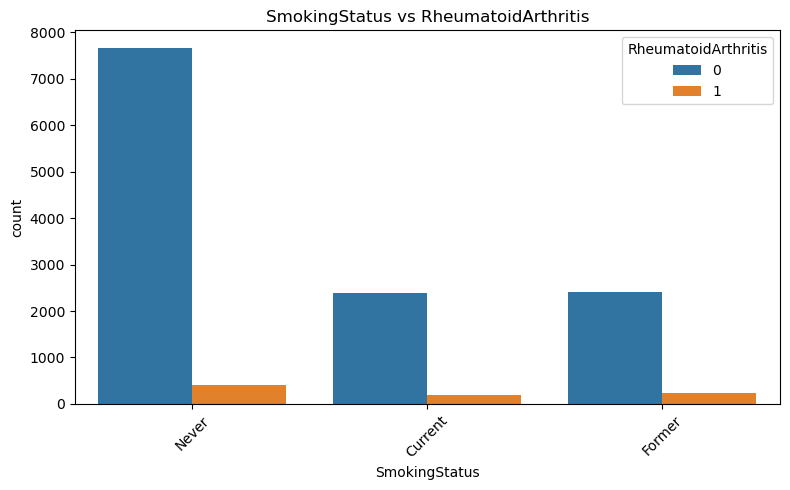



===== DrinkingStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
DrinkingStatus                
Almost non-drinker   2810  278
Frequent drinker     3968  214
Occasional drinker   5665  338

Percentage Row-wise:
RheumatoidArthritis          0         1
DrinkingStatus                          
Almost non-drinker   90.997409  9.002591
Frequent drinker     94.882831  5.117169
Occasional drinker   94.369482  5.630518


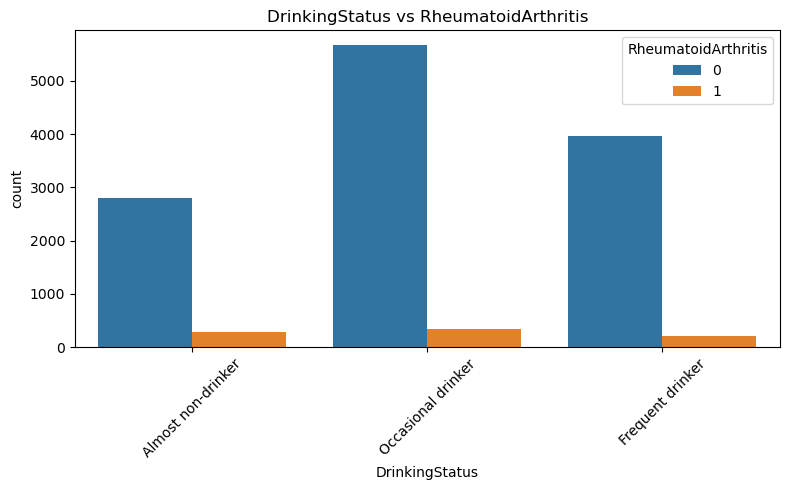



===== Hypertension vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Hypertension                  
Hypertension         3338  494
Normal               9105  336

Percentage Row-wise:
RheumatoidArthritis          0          1
Hypertension                             
Hypertension         87.108559  12.891441
Normal               96.441055   3.558945


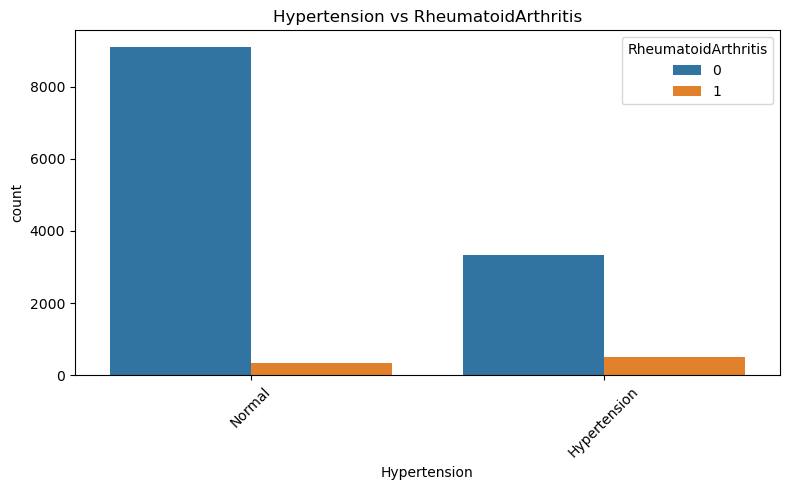



===== Diabetes vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis      0    1
Diabetes                       
Diabetes              1204  227
Normal               10426  528
Prediabetes            813   75

Percentage Row-wise:
RheumatoidArthritis          0          1
Diabetes                                 
Diabetes             84.136967  15.863033
Normal               95.179843   4.820157
Prediabetes          91.554054   8.445946


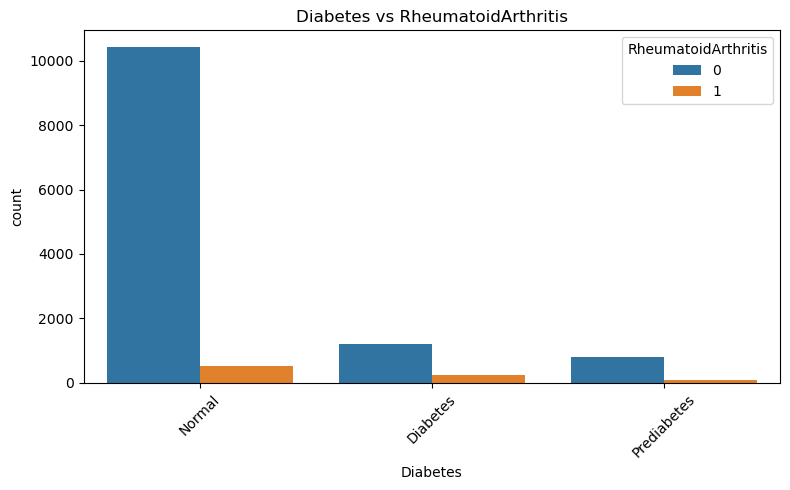



===== Hyperlipidemia vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Hyperlipidemia                
Hyperlipidemia       7923  664
Normal               4520  166

Percentage Row-wise:
RheumatoidArthritis          0         1
Hyperlipidemia                          
Hyperlipidemia       92.267381  7.732619
Normal               96.457533  3.542467


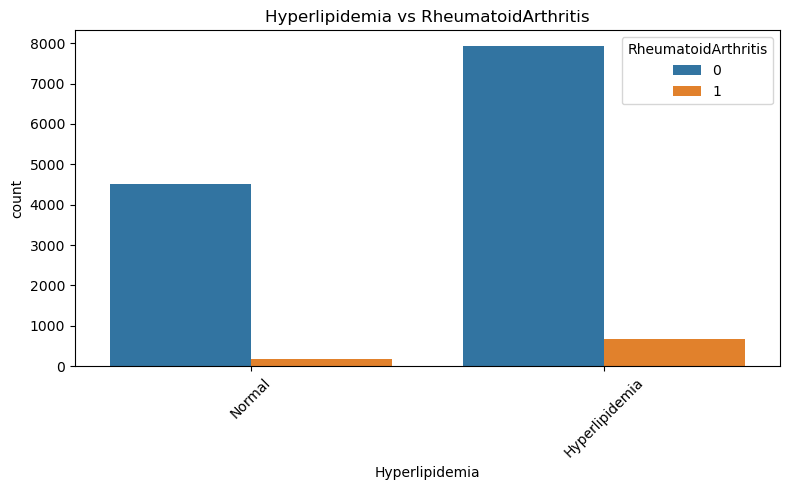

In [137]:
for col in cat_cols:
    print(f"\n\n===== {col} vs RheumatoidArthritis =====")
    
    # Crosstab
    ct = pd.crosstab(df[col], df['RheumatoidArthritis'])
    print("\nCounts:")
    print(ct)
    
    # Percentage distribution
    print("\nPercentage Row-wise:")
    print(ct.div(ct.sum(axis=1), axis=0) * 100)
    
    # Plot
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue='RheumatoidArthritis')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs RheumatoidArthritis")
    plt.tight_layout()
    plt.show()

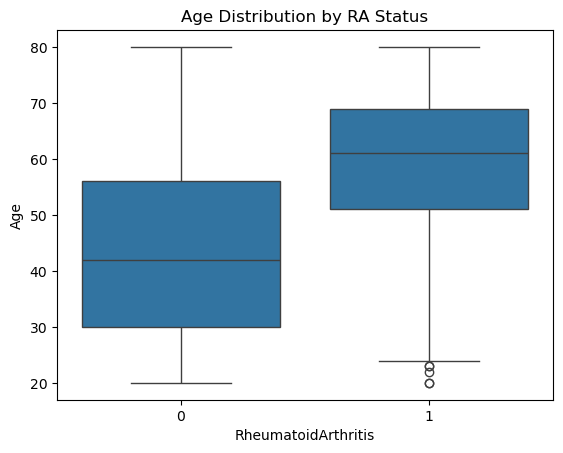

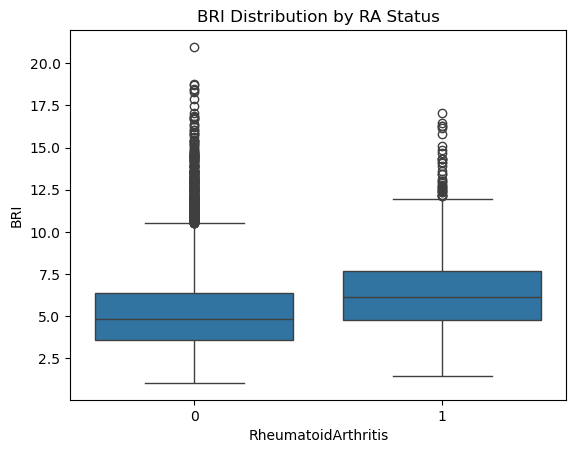

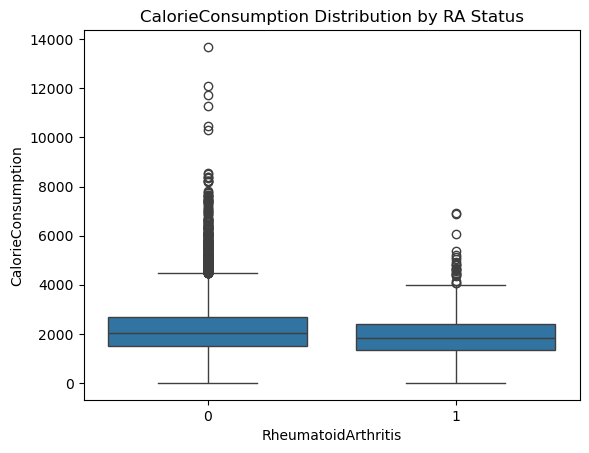

In [138]:
for col in ['Age','BRI','CalorieConsumption']:
    sns.boxplot(data=df, x='RheumatoidArthritis', y=col)
    plt.title(f"{col} Distribution by RA Status")
    plt.show()

<Axes: xlabel='RheumatoidArthritis', ylabel='count'>

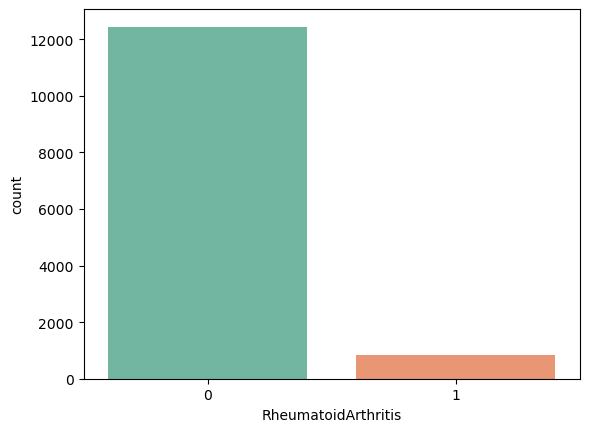

In [139]:
sns.countplot(data=df, x="RheumatoidArthritis", palette='Set2')

# Data Preprocessing & Feature Engineering

In [140]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,30,45,60,100], labels=['Young','Adult','MidAge','Old'])

df['CalorieConsumption'] = df.apply(
    lambda row: df[
        (df['Gender'] == row['Gender']) &
        (df['AgeGroup'] == row['AgeGroup'])
    ]['CalorieConsumption'].median()
    if row['CalorieConsumption'] == 0 else row['CalorieConsumption'],
    axis=1
)

In [141]:
df.drop(columns=['AgeGroup'],inplace=True)

In [142]:
Q1 = df['CalorieConsumption'].quantile(0.25)
Q3 = df['CalorieConsumption'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['CalorieConsumption'].quantile(0.995))

df['CalorieConsumption'] = df['CalorieConsumption'].clip(lower=800, upper=upper)

In [144]:
Q1 = df['BRI'].quantile(0.25)
Q3 = df['BRI'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['BRI'].quantile(0.995))

df['BRI'] = df['BRI'].clip(lower=1.0, upper=upper)

In [145]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'CaffeineConsumption'],
      dtype='object')

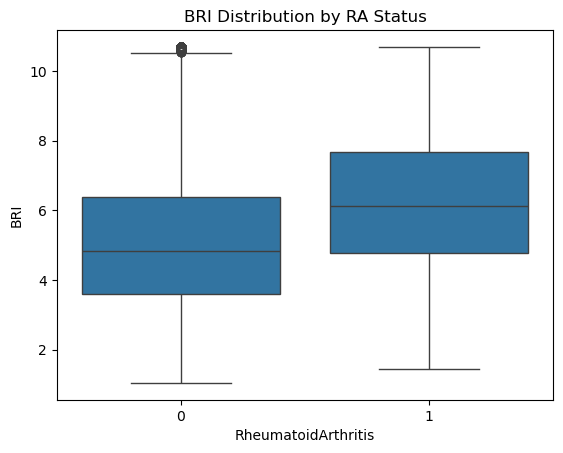

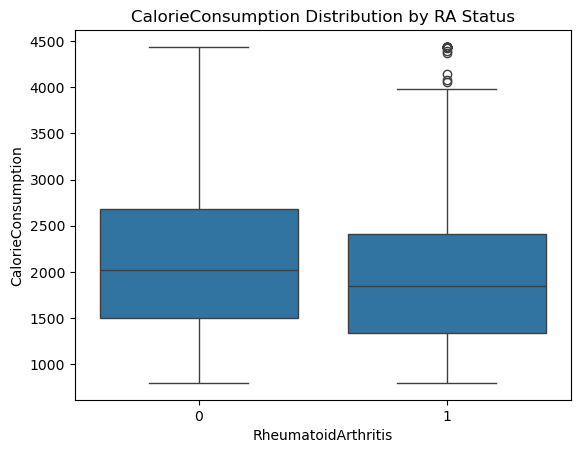

In [146]:
for col in ['BRI','CalorieConsumption']:
    sns.boxplot(data=df, x='RheumatoidArthritis', y=col)
    plt.title(f"{col} Distribution by RA Status")
    plt.show()

In [147]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Living Alone':0,'Living With A Partner':1})
df['Hypertension'] = df['Hypertension'].map({'Normal':0,'Hypertension':1})
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Normal':0,'Hyperlipidemia':1})

In [148]:
df['EducationLevel'] = df['EducationLevel'].map({
    'Below high school':0,
    'High school graduate':1,
    'Above high school':2
})

In [149]:
df['Diabetes'] = df['Diabetes'].map({'Normal':0,'Prediabetes':1,'Diabetes':2})

In [150]:
df['SmokingStatus'] = df['SmokingStatus'].map({'Never':0,'Former':1,'Current':2})

In [151]:
df['DrinkingStatus'] = df['DrinkingStatus'].map({
    'Almost non-drinker':2,
    'Occasional drinker':1,
    'Frequent drinker':0
})

In [152]:
df['FamilyIncome'] = df['FamilyIncome'].map({
    'PIR <= 1.3':0,
    '(1.3,3.5]':1,
    'PIR > 3.5':2
})

In [153]:
df = pd.get_dummies(df, columns=['Race','PhysicalActivity'], drop_first=True)

In [154]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'SmokingStatus', 'DrinkingStatus',
       'Hypertension', 'Diabetes', 'Hyperlipidemia', 'CalorieConsumption',
       'CaffeineConsumption', 'Race_Non-Hispanic Black',
       'Race_Non-Hispanic White', 'Race_Other', 'PhysicalActivity_Other',
       'PhysicalActivity_Sedentary', 'PhysicalActivity_Vigorous activity'],
      dtype='object')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13273 entries, 0 to 13272
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RheumatoidArthritis                 13273 non-null  int64  
 1   BRI                                 13273 non-null  float64
 2   Gender                              13273 non-null  int64  
 3   Age                                 13273 non-null  int64  
 4   EducationLevel                      13273 non-null  int64  
 5   MaritalStatus                       13273 non-null  int64  
 6   FamilyIncome                        13273 non-null  int64  
 7   SmokingStatus                       13273 non-null  int64  
 8   DrinkingStatus                      13273 non-null  int64  
 9   Hypertension                        13273 non-null  int64  
 10  Diabetes                            13273 non-null  int64  
 11  Hyperlipidemia                      13273

## Data modelling 

## Logistic Regression

Train class distribution:
 RheumatoidArthritis
0    0.937465
1    0.062535
Name: proportion, dtype: float64
Test class distribution:
 RheumatoidArthritis
0    0.937476
1    0.062524
Name: proportion, dtype: float64

========== TEST PERFORMANCE ==========
Accuracy : 0.7216572504708098
Precision: 0.14846625766871166
Recall   : 0.7289156626506024
F1-score : 0.24668705402650357
ROC-AUC  : 0.7743928708001955

Confusion Matrix (Test):
[[1795  694]
 [  45  121]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      2489
           1       0.15      0.73      0.25       166

    accuracy                           0.72      2655
   macro avg       0.56      0.73      0.54      2655
weighted avg       0.92      0.72      0.79      2655



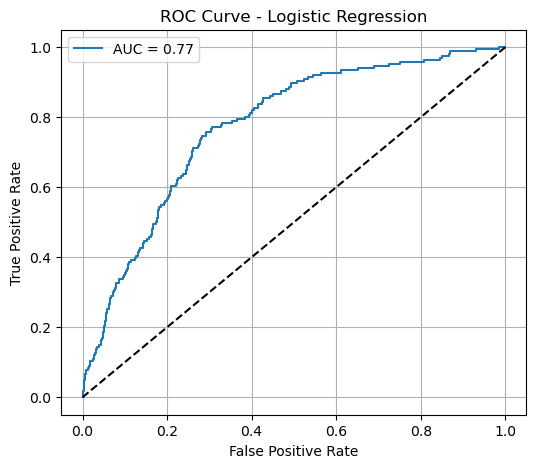


Top logistic coefficients (by absolute value):
                               feature  coefficient  abs_coef
0                                  Age     0.950455  0.950455
1                         Hypertension     0.518751  0.518751
2                               Gender     0.377543  0.377543
3              Race_Non-Hispanic Black     0.302444  0.302444
4                                  BRI     0.301659  0.301659
5                       Hyperlipidemia     0.246317  0.246317
6                         FamilyIncome    -0.230789  0.230789
7                        SmokingStatus     0.216993  0.216993
8                             Diabetes     0.215986  0.215986
9   PhysicalActivity_Vigorous activity    -0.198788  0.198788
10          PhysicalActivity_Sedentary     0.156182  0.156182
11                 CaffeineConsumption     0.146530  0.146530
12                          Race_Other    -0.129785  0.129785
13              PhysicalActivity_Other     0.126239  0.126239
14                    

In [46]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

target = "RheumatoidArthritis"

feature_cols = [c for c in df.columns if c != target]
X = df[feature_cols].copy()
y = df[target].copy()

RANDOM_STATE = 42

numeric_cols = ['BRI', 'Age', 'CalorieConsumption', 'CaffeineConsumption']
numeric_cols = [c for c in numeric_cols if c in X.columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  
)

pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(
        max_iter=4000,
        class_weight='balanced',
        solver='lbfgs',
        random_state=RANDOM_STATE
    ))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


pipeline.fit(X_train, y_train)


y_test_pred = pipeline.predict(X_test)
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

print("\n========== TEST PERFORMANCE ==========")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_prob))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, zero_division=0))

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

passthrough_cols = [c for c in feature_cols if c not in numeric_cols]
final_feature_order = numeric_cols + passthrough_cols

coeffs = pipeline.named_steps['clf'].coef_[0]

coef_df = pd.DataFrame({
    'feature': final_feature_order,
    'coefficient': coeffs,
    'abs_coef': np.abs(coeffs)
}).sort_values('abs_coef', ascending=False).reset_index(drop=True)

print("\nTop logistic coefficients (by absolute value):")
print(coef_df.head(30))


## Balanced XGBoost

Train distribution:
 RheumatoidArthritis
0    0.937465
1    0.062535
Name: proportion, dtype: float64
Test distribution:
 RheumatoidArthritis
0    0.937476
1    0.062524
Name: proportion, dtype: float64

Running balanced XGBoost with gridCV
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}
Best CV F1: 0.24479093399474328

 TEST SET PERFORMANCE 
Accuracy : 0.6986817325800376
Precision: 0.13646788990825687
Recall   : 0.7168674698795181
F1-score : 0.22928709055876687
ROC-AUC  : 0.7605560853296675

Confusion Matrix:
[[1736  753]
 [  47  119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      2489
           1       0.14      0.72      0.23       166

    accuracy                           0.70      2655
   macro avg       0.56      0.71      0.52      2655
weighted avg       0.92      0.70      0.78      2655



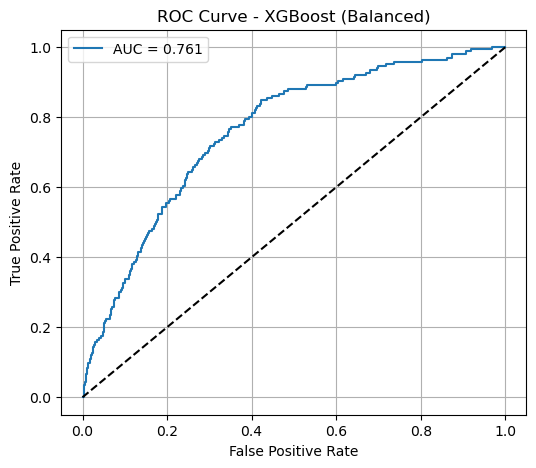

In [97]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from xgboost import XGBClassifier

TARGET = "RheumatoidArthritis"
RANDOM_STATE = 42
CV = 4
N_JOBS = -1

if TARGET not in df.columns:
    raise KeyError(f"Target column '{TARGET}' not found")

X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    random_state=RANDOM_STATE,
    use_label_encoder=False,
    n_jobs=1,
    scale_pos_weight=18
)

param_grid = {
    'n_estimators': [400, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [1, 3, 5],
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=CV,
    n_jobs=N_JOBS,
    verbose=2,
    refit=True
)

print("\nRunning balanced XGBoost with gridCV")
grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

best_xgb = grid.best_estimator_

y_test_pred = best_xgb.predict(X_test)
y_test_prob = best_xgb.predict_proba(X_test)[:, 1]

print("\n TEST SET PERFORMANCE ")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Balanced)")
plt.legend()
plt.grid(True)
plt.show()


## XGBoost with best hyper parameters (Tuned)

Train distribution:
 RheumatoidArthritis
0    0.937465
1    0.062535
Name: proportion, dtype: float64
Test distribution:
 RheumatoidArthritis
0    0.937476
1    0.062524
Name: proportion, dtype: float64

TEST SET PERFORMANCE (Final XGBoost)
Accuracy : 0.7065913370998117
Precision: 0.13381123058542413
Recall   : 0.6746987951807228
F1-score : 0.22333000997008973
ROC-AUC  : 0.7611006500893086

Confusion Matrix:
[[1764  725]
 [  54  112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      2489
           1       0.13      0.67      0.22       166

    accuracy                           0.71      2655
   macro avg       0.55      0.69      0.52      2655
weighted avg       0.92      0.71      0.78      2655



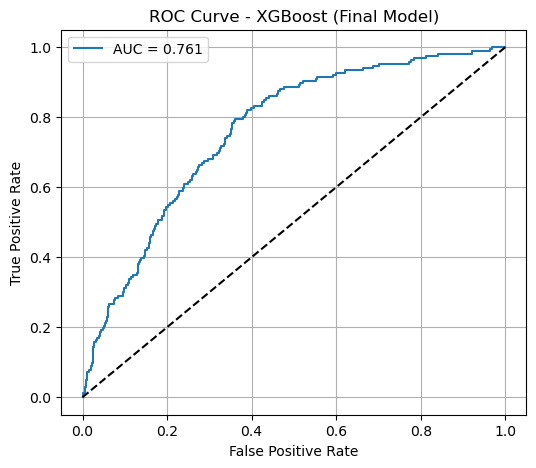

In [156]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from xgboost import XGBClassifier

TARGET = "RheumatoidArthritis"
RANDOM_STATE = 42
TEST_SIZE = 0.20

if TARGET not in df.columns:
    raise KeyError(f"Target column '{TARGET}' not found")

X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))


xgb_final = XGBClassifier(
    random_state=42,
    eval_metric="aucpr",
    scale_pos_weight=18,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=100,
    subsample=0.4,
    colsample_bytree=0.6
)

xgb_final.fit(X_train, y_train)

y_test_pred = xgb_final.predict(X_test)
y_test_prob = xgb_final.predict_proba(X_test)[:, 1]

print("\nTEST SET PERFORMANCE (Final XGBoost)")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Final Model)")
plt.legend()
plt.grid(True)
plt.show()


## Linear SVC

Fitting 4 folds for each of 3 candidates, totalling 12 fits

Best Params: {'clf__C': 0.01}
Best CV F1 Score: 0.25189143753084986

TEST PERFORMANCE (Linear SVC)
Accuracy : 0.7141242937853107
Precision: 0.14575866188769415
Recall   : 0.7349397590361446
F1-score : 0.2432701894317049

Confusion Matrix:
[[1774  715]
 [  44  122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      2489
           1       0.15      0.73      0.24       166

    accuracy                           0.71      2655
   macro avg       0.56      0.72      0.53      2655
weighted avg       0.92      0.71      0.79      2655



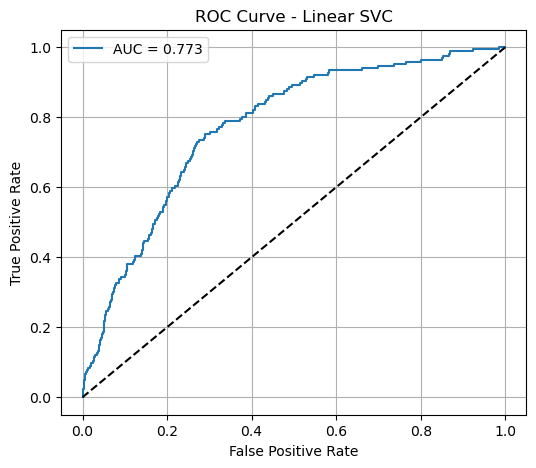

In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

TARGET = "RheumatoidArthritis"

X = df.drop(columns=[TARGET])
y = df[TARGET]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

numeric_cols = ['BRI', 'Age', 'CalorieConsumption', 'CaffeineConsumption']
numeric_cols = [c for c in numeric_cols if c in X.columns]

preprocessor = ColumnTransformer(
    [('num', StandardScaler(), numeric_cols)],
    remainder='passthrough'
)

pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', LinearSVC(class_weight='balanced', random_state=42))
])

param_grid = {
    'clf__C': [0.01, 0.05, 0.7]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=4,
    n_jobs=-1,
    verbose=2,
    refit=True
)

grid.fit(X_train, y_train)

print("\nBest Params:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("\nTEST PERFORMANCE (Linear SVC)")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

y_scores = best_model.decision_function(X_test)

auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear SVC")
plt.legend()
plt.grid(True)
plt.show()


## Decision tree

Train Distribution:
 RheumatoidArthritis
0    0.937465
1    0.062535
Name: proportion, dtype: float64
Test Distribution:
 RheumatoidArthritis
0    0.937476
1    0.062524
Name: proportion, dtype: float64

TEST PERFORMANCE (Decision Tree)
Accuracy : 0.6538606403013183
Precision: 0.11931243680485339
Recall   : 0.7108433734939759
F1-score : 0.20432900432900433
ROC-AUC  : 0.7441380628984398

Confusion Matrix:
[[1618  871]
 [  48  118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      2489
           1       0.12      0.71      0.20       166

    accuracy                           0.65      2655
   macro avg       0.55      0.68      0.49      2655
weighted avg       0.92      0.65      0.74      2655



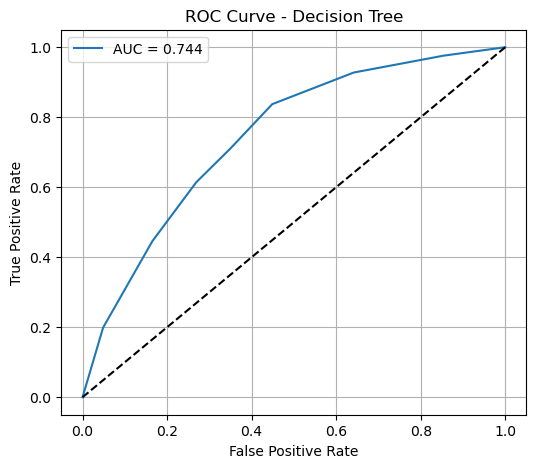

In [110]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

TARGET = "RheumatoidArthritis"
RANDOM_STATE = 42

if TARGET not in df.columns:
    raise KeyError(f"Target column '{TARGET}' not found in df")

X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train Distribution:\n", y_train.value_counts(normalize=True))
print("Test Distribution:\n", y_test.value_counts(normalize=True))

dt = DecisionTreeClassifier(
    criterion='entropy',     
    max_depth=3,          
    min_samples_split=5,     
    min_samples_leaf=3,     
    class_weight='balanced', 
    random_state=RANDOM_STATE
)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1] 

print("\nTEST PERFORMANCE (Decision Tree)")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()
